In [78]:
import numpy as np
import time
from scipy.special import erfinv
from scipy.linalg import hilbert, invhilbert, hadamard, pascal, lu
import matplotlib.pyplot as plt

In [2]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [3]:
mat1 = np.eye(10, k=1) + np.eye(10, k=-1)
np.fill_diagonal(mat1, 2)
mat1

array([[2., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 2., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 2., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 2., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 2., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 2., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 2., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 2.]])

In [4]:
def special_matrix_forloop(n):
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            if (j == 0):
                mat[i, j] = i + 1
            if (i == j):
                mat[i, j] = 2 * (i+1)
            if (i < j):
                mat[i, j] = 1

    return mat

special_matrix_forloop(10)

array([[ 2,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  4,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 3,  0,  6,  1,  1,  1,  1,  1,  1,  1],
       [ 4,  0,  0,  8,  1,  1,  1,  1,  1,  1],
       [ 5,  0,  0,  0, 10,  1,  1,  1,  1,  1],
       [ 6,  0,  0,  0,  0, 12,  1,  1,  1,  1],
       [ 7,  0,  0,  0,  0,  0, 14,  1,  1,  1],
       [ 8,  0,  0,  0,  0,  0,  0, 16,  1,  1],
       [ 9,  0,  0,  0,  0,  0,  0,  0, 18,  1],
       [10,  0,  0,  0,  0,  0,  0,  0,  0, 20]])

In [5]:
def special_matrix(n):
    # init empty matrix, fill with ones and
    mat = np.empty((n, n), dtype=int)
    mat.fill(1)
    
    # zero diagonal and below diagonal
    mat = np.triu(mat, k = 1)
    
    # entries of diagonal
    diag_mat = np.arange(1, n+1)
    row, col = np.diag_indices(n)
    mat[row, col] = 2 * diag_mat
    
    # replace first column
    mat[:,0] = diag_mat
    return mat

special_matrix(10)

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  4,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 3,  0,  6,  1,  1,  1,  1,  1,  1,  1],
       [ 4,  0,  0,  8,  1,  1,  1,  1,  1,  1],
       [ 5,  0,  0,  0, 10,  1,  1,  1,  1,  1],
       [ 6,  0,  0,  0,  0, 12,  1,  1,  1,  1],
       [ 7,  0,  0,  0,  0,  0, 14,  1,  1,  1],
       [ 8,  0,  0,  0,  0,  0,  0, 16,  1,  1],
       [ 9,  0,  0,  0,  0,  0,  0,  0, 18,  1],
       [10,  0,  0,  0,  0,  0,  0,  0,  0, 20]])

In [6]:
def magic(n):
# create a magic square of dimension n
  n = int(n)
  if n < 3:
    raise ValueError("Size must be at least 3")
  if n % 2 == 1:
    p = np.arange(1, n+1)
    return n*np.mod(p[:, None] + p - (n+3)//2, n) + np.mod(p[:, None] + 2*p-2, n) + 1
  elif n % 4 == 0:
    J = np.mod(np.arange(1, n+1), 4) // 2
    K = J[:, None] == J
    M = np.arange(1, n*n+1, n)[:, None] + np.arange(n)
    M[K] = n*n + 1 - M[K]
  else:
    p = n//2
    M = magic(p)
    M = np.block([[M, M+2*p*p], [M+3*p*p, M+p*p]])
    i = np.arange(p)
    k = (n-2)//4
    j = np.concatenate((np.arange(k), np.arange(n-k+1, n)))
    M[np.ix_(np.concatenate((i, i+p)), j)] = M[np.ix_(np.concatenate((i+p, i)), j)]
    M[np.ix_([k, k+p], [0, k])] = M[np.ix_([k+p, k], [0, k])]
  return M

In [7]:
def magic_test(n):
    mgc = magic(n)
    
    diags = []
    rows = []
    cols = []
    
    sum_diag1 = mgc.diagonal().sum()
    sum_diag2 = np.flipud(mgc).diagonal().sum()
    diags.append(sum_diag1)
    diags.append(sum_diag2)
    
    for i in range(n):
        row_sum = mgc[i,:].sum()
        rows.append(row_sum)
        col_sum = mgc[:,i].sum()
        cols.append(col_sum)

    print(diags)
    print(rows)
    print(cols)
    return

magic_test(6)

[111, 111]
[111, 111, 111, 111, 111, 111]
[111, 111, 111, 111, 111, 111]


In [8]:
mgc = magic(3)
mgcT = mgc.transpose()

for i in range(4):
    print(mgc)
    mgc = np.rot90(mgc)
    print(mgcT)
    mgcT = np.rot90(mgcT)

[[8 1 6]
 [3 5 7]
 [4 9 2]]
[[8 3 4]
 [1 5 9]
 [6 7 2]]
[[6 7 2]
 [1 5 9]
 [8 3 4]]
[[4 9 2]
 [3 5 7]
 [8 1 6]]
[[2 9 4]
 [7 5 3]
 [6 1 8]]
[[2 7 6]
 [9 5 1]
 [4 3 8]]
[[4 3 8]
 [9 5 1]
 [2 7 6]]
[[6 1 8]
 [7 5 3]
 [2 9 4]]


[[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
  27 28 29  0  0  0]
 [ 3  3  5  5  7  3  9  7 11  3 13  9 15  3 17 11 19  3 21 13 23  3 25 15
  27  3 29  0  0  0]
 [ 1  1  1  1  1  0  1  1  1  1  1  1  1  0  1  1  1  0  1  1  1  1  1  1
   1  1  1  0  0  0]]


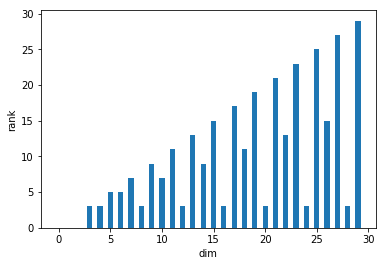

In [9]:
max_dim = 30
rank = np.zeros((3, max_dim), dtype=int)
for n in range(3, max_dim):
    mgc = magic(n)
    rank[0, n-3] = n 
    rank[1, n-3] = np.linalg.matrix_rank(mgc)
    
    try:
        mgcInv = np.linalg.inv(mgc)
        rank[2, n-3] = 1
    except np.linalg.LinAlgError:
        rank[2, n-3] = 0
 
print(rank)

p = plt.bar(rank[0,:], rank[1,:], 0.5)
plt.ylabel("rank")
plt.xlabel("dim")
plt.show()

In [10]:
np.random.rand(3,2)

array([[0.12170129, 0.57077885],
       [0.88674854, 0.85274649],
       [0.91076396, 0.18850418]])

In [82]:
# The Hilbert matrix is a notable example of a poorly conditioned matrix.
# The elements of Hilbert matrices are given by H(i,j) = 1/(i + j – 1).
hilb = hilbert(6)
hilb_inv = invhilbert(6, exact=True) # false gives approximation
print("Hilbert\n", hilb)
print(hilb_inv)

h = hilb.dot(hilb_inv) - np.eye(6)
print(h)

# Hadamard matrices are matrices of 1's and -1's whose columns are orthogonal: H'*H = n*I
# n must be a power of 2
hadamard = hadamard(4)
print("\nHadamard\n", hadamard)

# the portion of Pascal’s triangle that corresponds to the specified matrix dimensions
pascal = pascal(4)
print("\nPascal\n", pascal)

# The matrix is described by the formula A(i,j)=v(i)(N−j) such that its columns are powers of the vector v.
x = np.array([1, 2, 3, 5])
N = 3
vander = np.vander(x, 3)
print("\nVandermonde\n", vander)

Hilbert
 [[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1       ]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909]]
[[      36     -630     3360    -7560     7560    -2772]
 [    -630    14700   -88200   211680  -220500    83160]
 [    3360   -88200   564480 -1411200  1512000  -582120]
 [   -7560   211680 -1411200  3628800 -3969000  1552320]
 [    7560  -220500  1512000 -3969000  4410000 -1746360]
 [   -2772    83160  -582120  1552320 -1746360   698544]]
[[ 8.26005930e-14 -2.58837396e-12  1.99376071e-11 -7.25695060e-11
   7.43647366e-11 -2.10147455e-11]
 [-1.48547841e-13  4.79749573e-12 -3.90394383e-11  7.50013385e-11
  -7.34625694e-11  3.81161769e-11]
 [ 5.68434189e-14 -1.81898940e-

In [56]:
def randn(n, m = 0, seed = 0):
    # create random numbers analogous to matlab
    # requires "from scipy.special import erfinv"
    
    np.random.seed(seed)
    if m == 0:
        samples = np.random.rand(n)
    if m != 0:
        samples = np.random.rand(n, m)
    
    # transform from uniform to standard normal distribution using inverse cdf
    return np.sqrt(2) * erfinv(2 * samples - 1)


def lu_decomp(n):
    start_time = time.time()
    
    mat = randn(n, n)
    P, L, U = lu(mat)
    
    exec_time = round((time.time() - start_time), 2)
    isCorrect = np.allclose(mat - P @ L @ U, np.zeros((n, n)))
    return [isCorrect, exec_time, L, U, P ]

sol = lu_decomp(500)
print("Correct? {}. Execution time: t = {:.2f}s".format(sol[0],sol[1]))

Correct? True. Execution time: t = 0.08s


In [57]:
def lu_decomp_own(n):
    start_time = time.time()
    
    mat = randn(n, n)
    for i in range(n):
        if mat[i, i] != 0:
            for j in range(i+1, n):
                l = mat[j, i] / mat[i, i]
                mat[j,i] = l
                for k in range(i+1, n):
                    mat[j, k] = mat[j, k] - l * mat[i, k]

    L = np.tril(mat, k = -1) + np.eye(n)
    U = np.triu(mat, k = 0)
    
    exec_time = round((time.time() - start_time), 2)
    #isCorrect = np.allclose(randn(n, n) - np.dot(L, U), np.zeros((n, n)))
    
    return L, U, exec_time


L, U, exec_time = lu_decomp_own(300)
print("Execution time: t = {:.2f}s".format(exec_time))

Execution time: t = 5.75s


In [81]:
def is_pos_def(A):
    # check if matrix A is positiv definite
    
    if np.array_equal(A, A.T): # check for symmetry first
        try:
            np.linalg.cholesky(A) # attempt cholesky decomposition
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

dim = 5
print(f"Magic: {is_pos_def(magic(dim))}.")
print(f"Hilbert: {is_pos_def(hilbert(dim))}.")
print(f"Pascal: {is_pos_def(pascal(dim))}.")
print(f"Eye: {is_pos_def(np.eye(dim,dim))}.")
print(f"Random: {is_pos_def(randn(dim))}.")

Magic: False.
Hilbert: True.
Pascal: True.
Eye: True.
Random: False.


In [91]:
n = 4
mat = np.full((n, n), -1)
mat = np.triu(mat, k = 1) + np.eye(n)
mat

array([[ 1., -1., -1., -1.],
       [ 0.,  1., -1., -1.],
       [ 0.,  0.,  1., -1.],
       [ 0.,  0.,  0.,  1.]])